<a href="https://colab.research.google.com/github/MUMADE-TADM/s1_python-NicolasTapiador/blob/main/TADM2022_2a_Razonamiento_Borroso_NICOL%C3%81S_TAPIADOR_SOBRINO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Sistema Borroso
 

Vamos a crear un sistema de control borroso que modela cómo se puede evaluar la capacidad de un cliente para pedir un préstamo. Cuando se tiene que dar un préstamos se considerará la edad del peticionario, la cantidad del préstamos, la duración y los pagos en los que se divide. FInalmente nos dará una puntuación de 0 a 10 al préstamo. 


## Preliminares

https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html#example-plot-tipping-problem-newapi-py

* instalación de scikit-fuzzy

In [1]:
# https://pythonhosted.org/scikit-fuzzy/
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.3 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b3ff243ae32de8fed89a9e6197a7c209f3c3f20deee989e4a07c8a6f5216aa03
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


* importación de librerías


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

##  Sistema Borroso

Definimos los Antecedentes
* Edad del cliente
* pagos mensuales
* Cantidad del Préstamo
* Duración de la Amortización (min: 12 max 60)



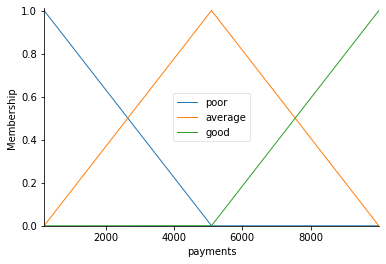

In [3]:
# nombre: 'payments'
# rango/dominio: np.arange(200, 10000, 1)
payments = ctrl.Antecedent(np.arange(200, 10000, 1), 'payments')
payments.automf(3) # número de etiquetas
payments.view()

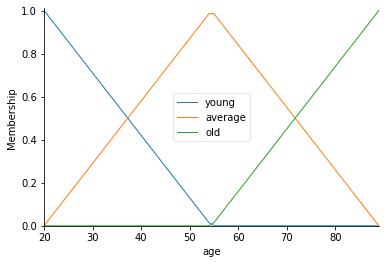

In [4]:
age = ctrl.Antecedent(np.arange(20,90, 1), 'age')
age.automf(3, names = ["young", "average", "old"])
age.view()

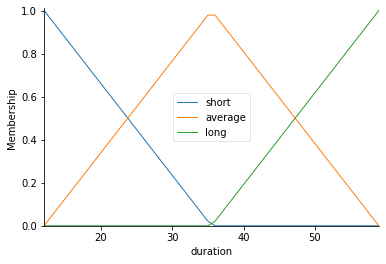

In [5]:
duration = ctrl.Antecedent(np.arange(12, 60, 1), 'duration')
duration.automf(3, names=["short", "average", "long"])
duration.view()

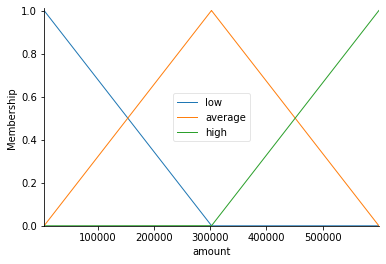

In [6]:
amount = ctrl.Antecedent(np.arange(5000, 600000, 1), 'amount')
amount.automf(3,  names = ["low","average","high"])
amount.view()

Definimos el consecuente

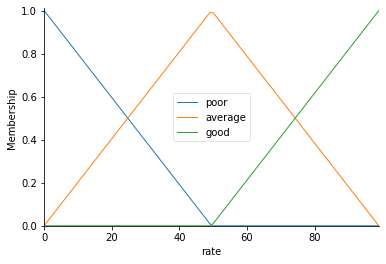

In [7]:
rate = ctrl.Consequent(np.arange(0, 100, 1), 'rate')
rate.automf(3)
rate.view()


En este apartado se está creando o mejor dicho, se está construyendo un conjunto borroso. Tenemos cuatro variables para construir la representación;
- Edad.
- Duración.
- Pagos
- Cantidad de dinero.

Estas variables que intervienen, lo hacen como hipotesis en una regla asociada a un **dominio** y cada dominio puede estar **dividido** en tantos conjuntos borrosos como el expero crea.

## Reglas borrosas
-----------
Ahora, para hacer estos triángulos útiles, definimos la *relación borrosa*
entre las variables de entrada y salida. Para el ejemplo vamos a considerar las siguientes reglas simples (para hacer un sistema completo se necesitarían algunas más) 

1. Si la duración y la cantidad son pequeñas entonces la calificación será buena.
2. Si la cantidad es alta, los pagos pequeños y la duración alta entonces la calificación será *pobre*
3. Si la cantidad es media y los pagos también medios si la edad del cliente es baja entonces el rating es medio. 

La clave de estas reglas es que son borrosas, es decir que expresamos la información de forma lingüística intentando manejar la incertidumbre inherente. 



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f2a33ed0850>)

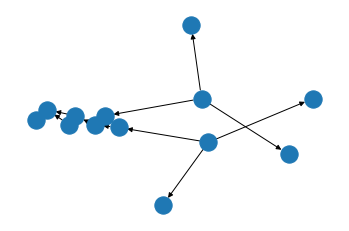

In [8]:
rule1 = ctrl.Rule(duration['short'] & amount['low'], rate['good'])
rule2 = ctrl.Rule(amount['high'] & payments['average'] & duration["long"], rate["poor"])
rule3 = ctrl.Rule(age['young'] & amount['average'], rate['average'])

rule1.view()

Ahora que tenemos nuestras reglas definidas, podemos simplemente crear un sistema de control vía:

In [9]:
rating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
rating_ctrl.graph

Con el fin de simular este sistema de control, crearemos un
"Sistema de Control y Simulación".  Este objeto que representa al controlador aplicado a un conjunto específico de circunstancias.  

In [10]:
rating = ctrl.ControlSystemSimulation(rating_ctrl)

Ahora podemos simular nuestro sistema de control simplemente especificando las entradas y llamando al método *compute*.  

Supongamos que un cliente de 40 años va a pedir un préstamos a 12 años con pagos de 2000 y una cantidad de 300000

In [11]:
rating.input['age'] = 30
rating.input['duration'] = 60
rating.input['payments'] = 2000
rating.input['amount'] = 500000


44.52999446644107


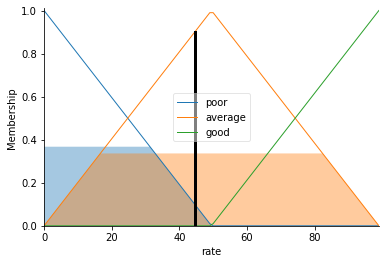

In [12]:
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Se introducen nuevas ejemplos, para ver como van cambiando los resultados de los gráficos, unicamente modificando el valor que se les da a las variables:


49.49999999999995


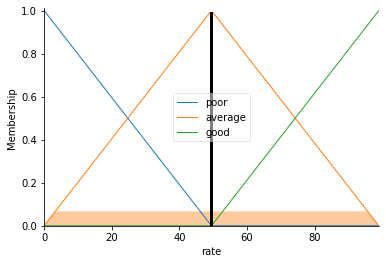

In [13]:
rating.input['age'] = 25
rating.input['duration'] = 48
rating.input['payments'] = 2500
rating.input['amount'] = 25000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Como se observa, para un edad de 25 años, un préstamo con una duración de 48 meses (4 años) y una cuantía de 25.000 euros y un pago de 2500 euros. Muy cerca de obtener un rating con valor de 50.

**Vamos con otros ejemplo nuevo, vamos aumentar la edad del cliente;**


49.500000000000036


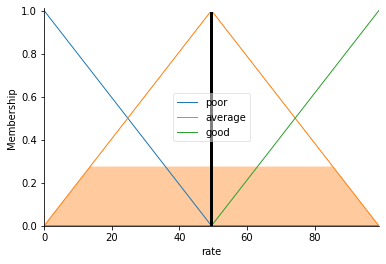

In [14]:
rating.input['age'] = 45
rating.input['duration'] = 48
rating.input['payments'] = 3000
rating.input['amount'] = 250000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Vamos probando con nuevos cambios;


19.538903651693747


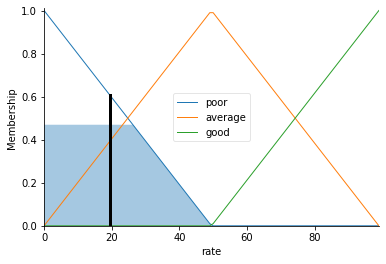

In [20]:
rating.input['age'] = 45
rating.input['duration'] = 60
rating.input['payments'] = 2500
rating.input['amount'] = 600000
rating.compute()
print(rating.output['rate'])
rate.view(sim=rating)

Como se ha observado a lo largo de los ejercicios, dependiendo del valor de las variables que hemos marcado y construido, el gráfico y el codigo nos va devolviendo una serie de resultados.

Estos resultados es una puntuación de "concesión" del prestamo para el cliente, es decir, si se le daría el ok o no.